<a href="https://colab.research.google.com/github/MarcosBSiq/Projetos_Python/blob/main/PROJETO_DE_AN%C3%81LISE_DE_VIABILIDADE_DA_COMPRA_DE_IM%C3%93VEIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  PROJETO DE ANÁLISE DE VIABILIDADE DA COMPRA DE IMÓVEIS                                                


---


CONTEXTUALIZAÇÃO

A empresa te contratou pois quer saber quais seriam os 5 imóveis que 
ela deveria investir e o porquê e quais 5 você não recomendaria o 
investimento de jeito nenhum dado as informações presentes na base de dados.


DESCRIÇÃO DAS VARIÁVEIS PRESENTES NA BASE DE DADOS

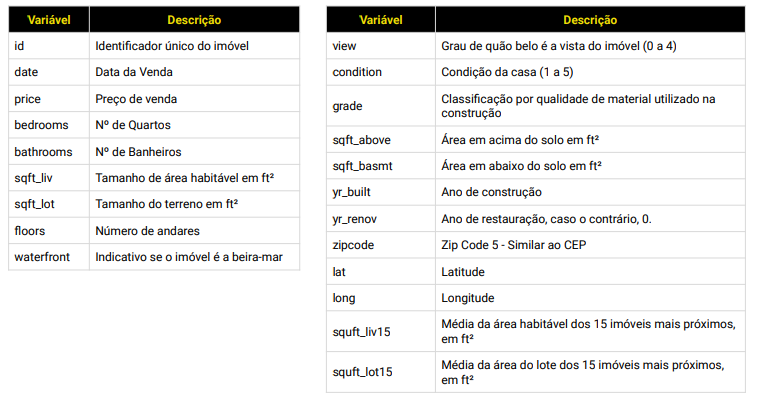

#Instalação e importação das bibliotecas


# Relatório descritivo




##Autor: Marcos Bolsoni Siqueira					

A Questão de Negócio
A meta deste projeto é chegar a conclusão sobre quais seriam as 5 melhores opções de investimento em imóveis que se encontram distribuídos pelo condado de King County nos EUA, bem como, identificar 5 opções de imóveis em que a empresa não deveria investir. Para isto será utilizada uma base de dados disponibilizada na plataforma Kaggle que contém dados sobre a venda de imóveis e suas características entre os anos de 2014 e 2015.

##1.	Business Understanding
A base de dados disponibilizada para as análises contém as seguintes informações:
•	‘id’ (identificado único do imóvel); 

•	‘date’ (data da venda); 

•	‘price’ (preço da venda); 

•	‘bedrooms’ (número de quartos); 

•	‘bathrooms’ (número de banheiros); 

•	‘sqft_liv’ (tamanho da área habitável em ft²); 

•	‘sqft_lot’ (tamanho do terreno em ft²); 

•	‘floors’ (número de andares);

•	‘waterfront’ (indica se o imóvel fica a beira mar); 

•	‘view’ (grau de beleza da vista de um imóvel, indo do valor 0 até 4); 

•	‘condition’ (condição da casa, indo do valor 0 até 5); 

•	‘grade’ (classificação de acordo com a qualidade do material utilizado na construção); 

•	‘sqtf_above’ (área cima do solo em ft²); 

•	‘sqft_basmt’ (área abaixo do solo em ft²);

•	‘yr_built’ (ano de construção);

•	‘yr_renov’ (ano de restauração, caso contrário, 0);

•	‘zipcode’ (informação similar ao cep);

•	‘lat’ (latitude);

•	‘long’ (longitude);

•	‘squft_liv15’ (média da área habitável dos 15 imóveis mais próximos em ft²);

•	‘squft_lot15’ (média da área do lote dos 15 imóveis mais próximos em ft²).

O objetivo final do projeto é recomendar ao cliente 5 opções de imóvel para compra, de acordo com as análises e insights obtidos através dos dados, bem como, 5 opções de imóvel cuja compra não é recomendada.

#2.	Data Understanding

##2.1	Coleta de dados e limpeza dos dados
Em uma análise inicial dos dados disponíveis já é possível identificar algumas questões e verificar se existem anomalias nos dados disponíveis. Primeiramente, utilizando a biblioteca pandas é possível fazer a importação da base de dados para dentro do Google Colab e verificar quais são os tipos dos dados de cada uma das variáveis. Foram importadas também as bibliotecas numpy para tratamento e exploração dos dados, bem como as bibliotecas seaborn e matplotlib para visualização dos dados.

Buscando as informações dos dados presentes no data frame é possível notar que a variável ‘date’ está como o tipo objeto o que demandará que estes dados sejam convertidos no tipo datetime para facilitar a análise temporal dos dados. Também é possível notar neste momento que não existem valores nulos no data frame e também não existem entradas de linhas duplicadas, porém, é importante se atentar ao fato de que existem ID’s duplicados, indicando que alguns imóveis foram vendidos mais de uma vez no período de tempo analisado.

Outra questão importante verificada é que é necessário utilizar alguma biblioteca para realizar a identificação da cidade onde se encontra cada casa através do campo zipcode. Para isto, se faz necessário instalar e importar a biblioteca uszipcode e utilizar uma das suas funções para que um uma nova coluna chamada ‘city’ seja adicionada trazendo o nome da cidade onde cada imóvel se localiza.

Olhando para a descrição das variáveis latitude e longitude e dado o objetivo do projeto percebeu-se que estas duas informações não seriam necessárias para se atingir insights relevantes para a tomada de decisão. As duas colunas foram removidas do data frame.

Foi realizada a adição de uma coluna chamada de ‘reforma’. A ideia aqui foi utilizar a coluna ‘yr_renovated’, que já estava presente no data frame original, para criar esta nova coluna que contém os valores 0 (para imóveis que nunca foram reformados) e 1 (para imóveis que já foram reformados em algum momento). Desta maneira foi possível identificar o impacto desta característica sobre os preços dos imóveis de maneira geral.

Foram adicionadas outras duas colunas chamadas de ‘valor_ft’ e ‘valor_liv’. A primeira contém o resultado da divisão da coluna ‘price’ pela coluna ‘sqft_lot’ de modo a descobrir o valor de cada ft² dos terrenos dos imóveis. A mesma lógica foi aplicada a segunda coluna, a diferença é que a coluna ‘price’ foi dividida pela coluna ‘sqft_living’ de modo a encontrar o valor de cada ft² da área habitável de cada imóvel.

Por fim, um ponto importante diz respeito as informações relacionadas ao número de banheiros de cada imóvel. É possível notar que a variável bathrooms é do tipo float, ou seja, ela contém números inteiros ou com decimais. Isso se dá pois, pelo padrão americano, um banheiro completo contém 4 elementos (pia, vaso sanitário, chuveiro e banheira) e seu valor é considerado como 1, enquanto que caso o banheiro possua apenas 2 destes 4 elementos a contagem do número de banheiros será 0.5 ou 0.75 caso possua 3 dos 4 elementos. Sendo assim, a variável do tipo float não é uma inconsistência a ser tratada.

##2.2	Exploração dos dados
A ideia inicial para se chegar à indicação de compra dos imóveis ao final do projeto foi partir de um contexto ‘macro’, ou seja, separando os imóveis de acordo com cada cidade onde se localizam verificar aquela cidade mais atrativa para realização do investimento, bem como, identificar a cidade onde não seria tão interessante realizar a compra de imóveis. Esta identificação foi realizada através da análise das variáveis que possuíam as maiores correlações positivas com os preços dos imóveis (correlação acima de 0,5 com a variável ‘price’) e após isto chegar até um contexto mais ‘micro’ onde dentro das cidades identificadas foram selecionados 5 imóveis específicos como sugestão de compra e outros 5 como não indicados para compra.

Já de início ao plotar um gráfico do tipo boxplot com os eixos de cidade e preço foi possível verificar que algumas cidades como Seattle e Bellevue possuíam muitos dados outliers cujos preços de alguns imóveis se distanciavam muito dos preços médios de tais cidades. Por outro lado, foi possível identificar também que a cidade de Medina tinha uma amostragem de dados bastante coerente com pouquíssimos outliers presentes.

Dito isto, foi realizada uma correlação entre as variáveis apresentada através de um gráfico de heatmap onde foi possível identificar que as 5 variáveis que possuíam as maiores correlações com a dinâmica dos preços dos imóveis foram, em ordem das maiores correlações para as menores: sqft_living; grade; sqft_above; sqft_living15; bathrooms. Cabe destacar que foram consideradas variáveis significativas para esta análise aquelas que tiveram correlação de no mínimo 0,5 com o preço, o que significa que o aumento positivo de alguma destas variáveis tende a corresponder a um aumento também positivo no preço do imóvel.

Por exemplo, quanto maior a área habitável de um imóvel ou quanto mais banheiros ele possuir a tendência é de que seu preço de venda também seja maior.
Partiu-se então para uma análise mais detalhada destas 5 variáveis que tiveram maior impacto sobre os preços. Para isto foram rodados gráficos do tipo scatter plot visando identificar a existência de dispersão entre estes dados e os preços dos imóveis, além disto, também foi utilizado para parâmetro de comparação a plotagem de um gráfico da variável sqft_lot (que não apresentou correlação alta com o preço) para verificar a diferença de comportamento com relação as 5 variáveis citadas anteriormente. A seguir serão analisadas as 5 variáveis individualmente.

•	Tamanho da área habitável: Pelo gráfico de dispersão é possível notar que os imóveis apresentam uma tendência de aumento dos preços quanto maior for o tamanho da área habitável de um imóvel, assim como indica a correlação entre as variáveis. Outro ponto importante é que esta relação se acentua principalmente nos imóveis que possuem 6.000 ft² ou mais, em imóveis com tamanhos menores do que este os dados se mostram bastante agrupados indicando que o impacto nestes imóveis menores não é tão acentuado.

•	Classificação da qualidade dos imóveis: Através do gráfico de dispersão e também pelo gráfico de boxplot é possível notar que esta variável é aquela onde o preço acompanha de forma bem clara a elevação da nota de qualidade do imóvel, mesmo com a presença de alguns outliers a mediana entre cada um dos níveis de classificação mostra que quanto maior o grade de um imóvel maior será seu preço.

•	Área acima do solo: Assim como o tamanho da área habitável de um imóvel esta variável apresentou um comportamento parecido com aquela. Também existe uma tendência de aumento dos preços de venda conforme o imóvel possua uma maior área que se encontra acima do solo. Neste caso os impactos maiores sobre os preços são observados nos imóveis que possuem mais de 5.000 ft² acima do solo.

•	Média da área de 15 imóveis próximos: Apesar desta variável apresentar bastante dispersão entre os dados, principalmente a partir dos 4.500 ft², também é possível verificar sua influência positiva sobre os preços dos imóveis.

•	Banheiros: Aqui também fica notável a importância de haver um maior número de banheiros no imóvel para que seu preço seja valorizado, vale atentar-se para o fato de que a partir de 5 banheiros na casa é possível observar uma dispersão maior dos dados, portanto, pelo menos até 5 banheiros é interessante procurar imóveis que possuam uma quantidade maior deste cômodo.

A coluna contendo uma variável relacionada a reforma foi adicionada com o intuito de identificar se os preços dos imóveis apresentavam algum comportamento específico quando segmentados entre imóveis que já haviam sido reformados e aqueles que não haviam. Através da média dos preços dos imóveis divididos entre entes dois grupos foi possível notar que, de maneira geral, imóveis que passaram por reforma possuem um preço de venda maior. Sendo assim mais uma informação interessante para auxiliar na tomada de decisão final. 

Por fim, utilizando a coluna de liv_value é possível identificar o valor de cada ft² da área habitável dos imóveis. Uma vez que esta é uma variável derivada do preço e da área habitável naturalmente ela também é interessante para analisar o comportamento dos valores dos imóveis. Dito isto, a média geral do valor do ft² habitável foi de aproximadamente 264 dólares, ao analisarmos a média da variável liv_value agrupada por cidade vemos que a cidade de Federal Way possui o menor valor médio de ft² por imóvel, aproximadamente 151 dólares por ft², ao passo que a cidade de Medina possui o valor do ft² habitável muito valorizado, aproximadamente 568 ft². Olhando o gráfico de boxplot para esta variável vemos, inclusive, que a distribuição do ft² entre os imóveis de Medina não sofre influência de outliers tendo a maior mediana dentre todas as cidades neste quesito. 

#3. Análise final e sugestão de compra
Ao longo das análises e dos gráficos apresentados foi possível verificar que de maneira geral para cada uma das variáveis que possuem maior influência sobre os preços dos imóveis a cidade de Medina apresentou os melhores resultados. Algo que ajuda a sustentar esta conclusão também se deve ao fato de que a cidade de Medina apresentou pouquíssimos outliers, ou seja, as variáveis analisadas não sofreram influência de dados muito discrepantes da grande maioria.

Em contrapartida a cidade de Seattle apresentou os piores resultados ao se analisar as principais variáveis que influenciam os preços. Para isto foi necessário desconsiderar os valores outliers presentes nos dados dos imóveis de Seattle pois estes apareceram em grande quantidade ao longo das análises.
Aliado às análises gráficas anteriores os dados também foram agrupados por cidade e ordenados de acordo com as 5 variáveis que mais impactam sobre os preços (área habitável, nota de classificação do imóvel, área acima do solo, média da área de 15 imóveis próximos e número de banheiros). Desta forma foi possível identificar que de fato Medina possui as melhores opções de imóvel no geral e Seattle possui os imóveis menos indicados para compra.

Para decidir quais imóveis adquirir aconselha-se que a empresa opte por imóveis que se encontram na cidade de Medina, que possuam uma grande área habitável (de preferência acima dos 6.000 ft²), possuam um maior número de banheiros (aproximadamente 5), que sejam classificados com as maiores notas de qualidade possíveis, com uma área acima do solo (imóveis a partir de 5.000 ft²). Além disso, aconselha-se a procura por imóveis que ainda não foram reformados, pois após realizar uma reforma a tendência é de que o preço de venda do mesmo suba. 
ID dos imóveis sugeridos para compra:

1.	9208900037
2.	2470100110
3.	6447300265
4.	3262300555
5.	7397300170

ID dos imóveis sugeridos para não se comprar:
1.	2856101479
2.	1723049033
3.	6896300380
4.	9266700190
5.	6303400395

In [ ]:
!pip install uszipcode 
from uszipcode import SearchEngine 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 121 kB 39.8 MB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#Importação da base de dados

In [ ]:
# IMPORTAÇÃO DA BASE DE DADOS

df = pd.read_csv('/content/kc_house_data.csv')


# PRINTANDO AS 5 PRIMEIRAS LINHAS DA BASE DE DADOS

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#Compreensão e tratamento dos dados



In [ ]:
# Identificando informações gerais (tipagem dos dados, colunas existentes e número de registros)

df.info()


print()

# Identificnado a existência de dados em branco

print(df.isnull().sum())

# Identificando a existência de entradas duplicadas

print(df.duplicated().sum())

# Identificando a existência de Id's duplicados

print()
print(f'Existem {df.duplicated("id").sum()} Ids duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# Removendo as colunas de latitude e longitude

df = df.drop(columns=['lat'])


df = df.drop(columns =['long'])

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [ ]:
# Usando a biblioteca uszipcode para identificar a cidade onde o imóvel se localiza através do campo zipcode

engine = SearchEngine() 
 
cidades = [] 

for index, row in df.iterrows():     
  zipcode = engine.by_zipcode(df['zipcode'][index])    
  cidades.append(zipcode.major_city) 
df['city'] = cidades 

df.head()


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,Seattle
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Seattle
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,Kenmore
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,Seattle
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,Sammamish


In [ ]:
# Convertendo a coluna de data para o formato de date time

df['date'] = pd.to_datetime(df['date'])


In [ ]:
# Criando uma coluna para identificar imóveis reformados

df['reforma'] = [1 if i > 0 else 0 for i in df['yr_renovated']]
display(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city,reforma
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,1340,5650,Seattle,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,1690,7639,Seattle,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,2720,8062,Kenmore,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,1360,5000,Seattle,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,1800,7503,Sammamish,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,1530,1509,Seattle,0
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,1830,7200,Seattle,0
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,1020,2007,Seattle,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,1410,1287,Issaquah,0


In [ ]:
# Calculando o valor por tamanho do terreno em ft²

valor_ft = df['price'] / df['sqft_lot']


# Calculando o valor por área habitável dos imóveis em ft²

valor_liv = df['price'] / df['sqft_living']

# Adicionando as novas colunas ao Data Frame

df['ft_value'] = valor_ft

df['liv_value'] = valor_liv

df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,city,reforma,ft_value,liv_value
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,1340,5650,Seattle,0,39.274336,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,1690,7639,Seattle,1,74.288870,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,2720,8062,Kenmore,0,18.000000,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,1360,5000,Seattle,0,120.800000,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,1800,7503,Sammamish,0,63.118812,303.571429


#Análise dos dados

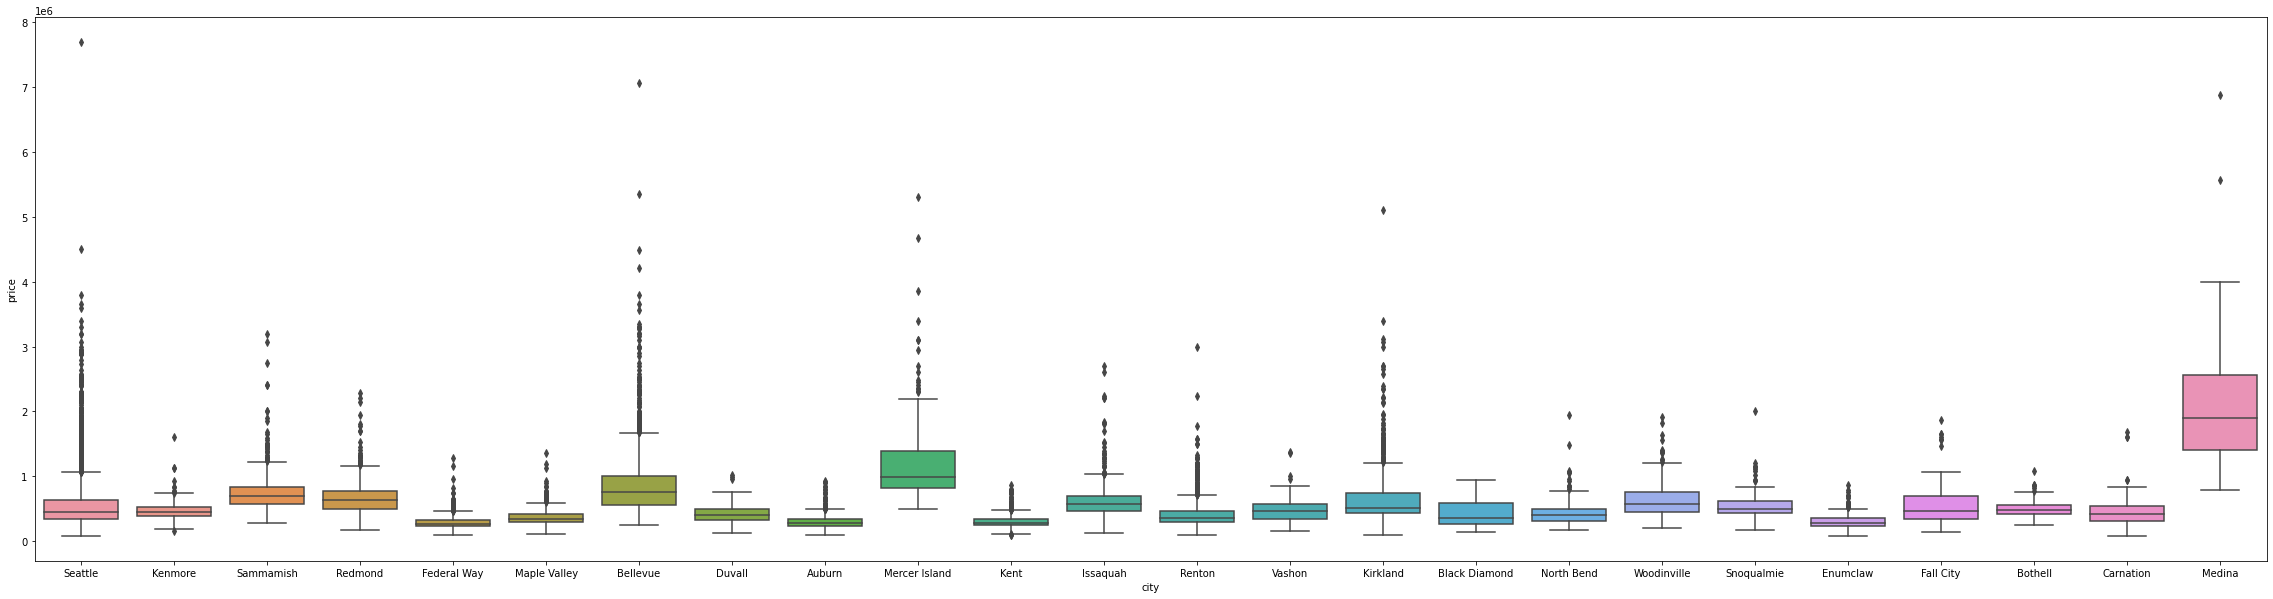

In [ ]:
# Analisando a distribuição dos preços dos imóveis por cidade

fig, ax = plt.subplots(figsize=(40, 10))

sns.boxplot(data = df, x = 'city', y = 'price');

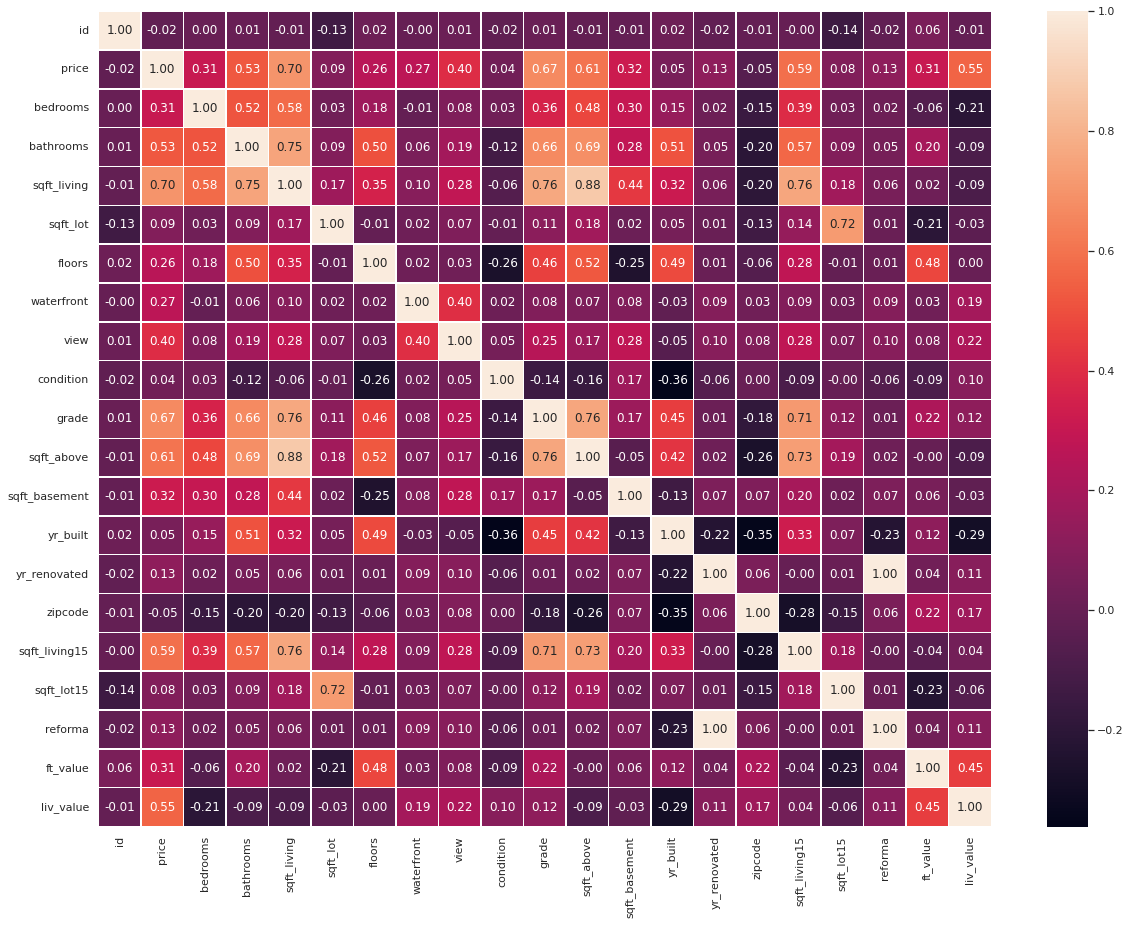

In [ ]:
# Identificando os níveis de correlação entre o preço e as demais variáveis:

sns.set(rc={'figure.figsize':(20,15)})

ax = sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".2f")

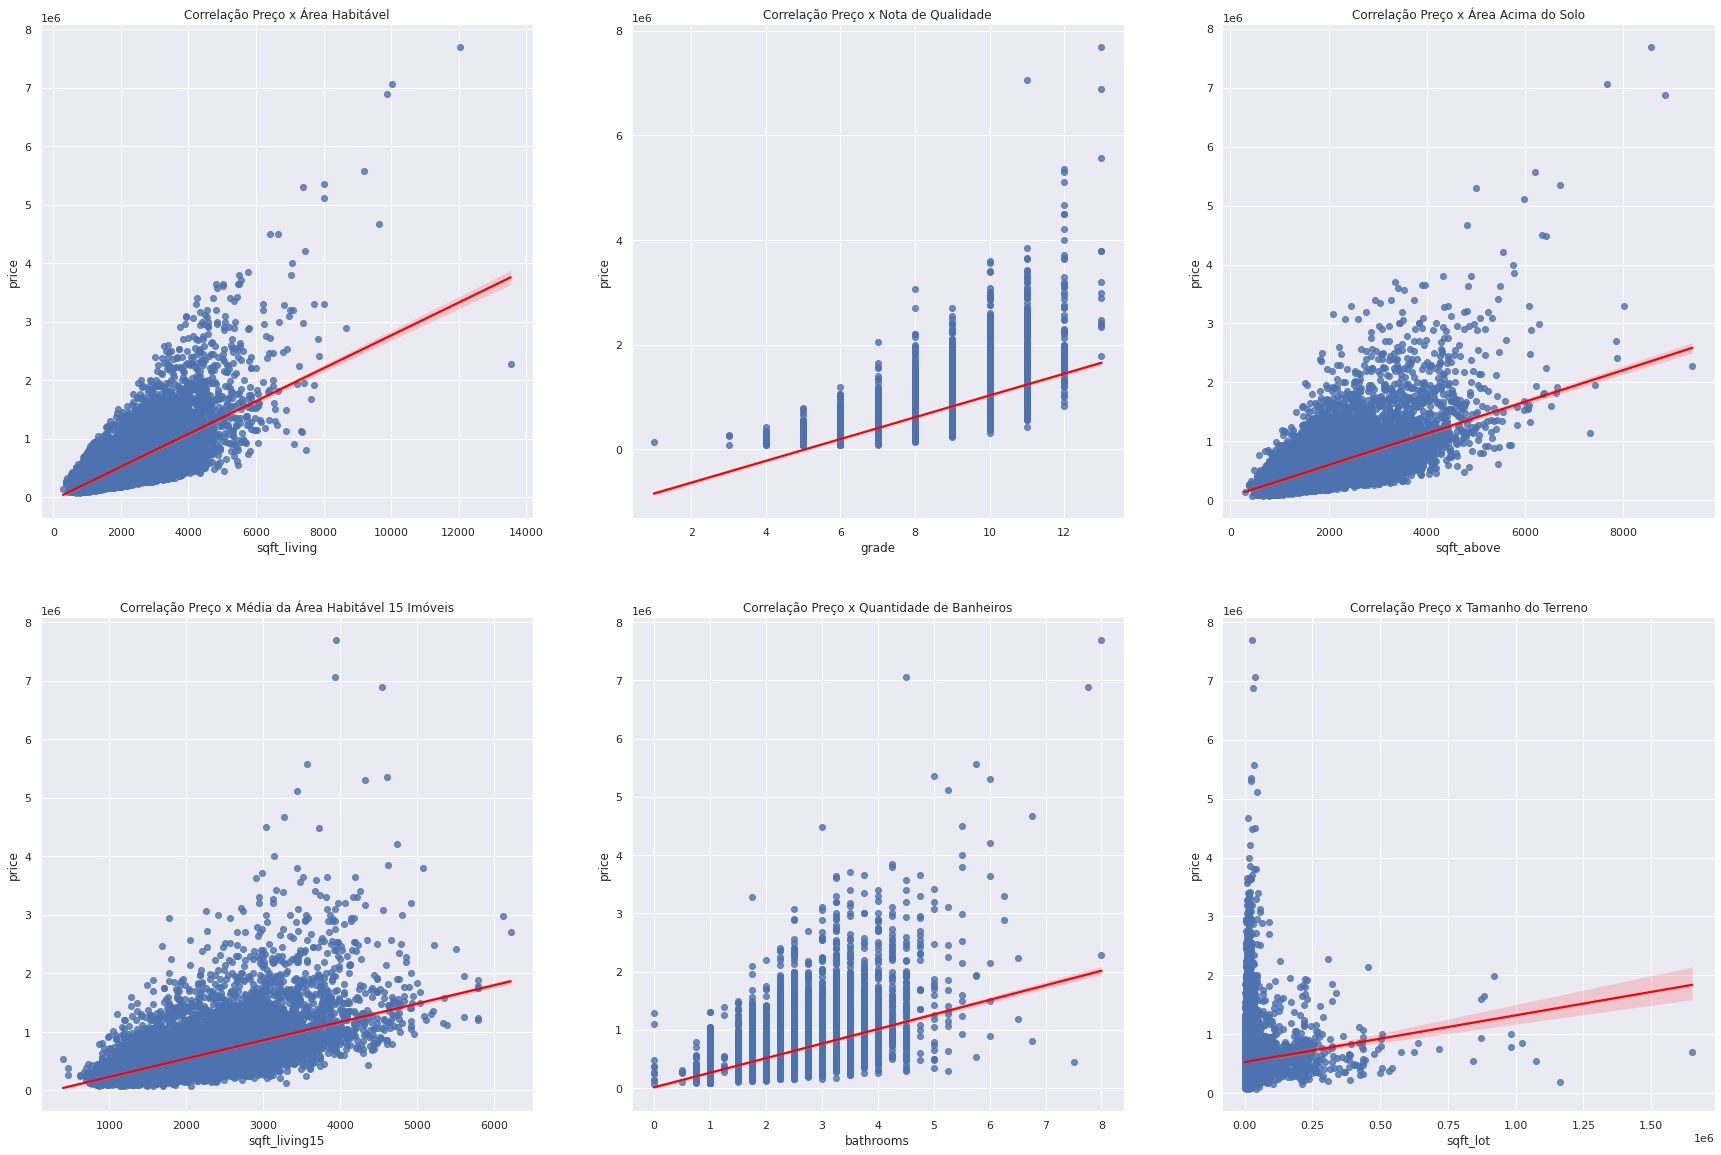

In [ ]:
# Usando gráficos de dispersão para verificar a relação de causa e efeito entre as 5 variáveis (bathrooms, sqft_living, grade, sqft_above, sqft_living15) que apresentaram correlação maior do que 0,5 com o preço. 
# Também foi analisada a relação da variável sqft_lot com o preço.

janela, graficos = plt.subplots(nrows=2, ncols=3, figsize=(30,20))

sns.regplot(data=df, x='sqft_living', y='price', line_kws={'color': 'red'}, ax=graficos[0][0]).set_title('Correlação Preço x Área Habitável');
sns.regplot(data=df, x='grade', y='price', line_kws={'color': 'red'}, ax=graficos[0][1]).set_title('Correlação Preço x Nota de Qualidade');
sns.regplot(data=df, x='sqft_above', y='price', line_kws={'color': 'red'}, ax=graficos[0][2]).set_title('Correlação Preço x Área Acima do Solo');
sns.regplot(data=df, x='sqft_living15', y='price', line_kws={'color': 'red'}, ax=graficos[1][0]).set_title('Correlação Preço x Média da Área Habitável 15 Imóveis');
sns.regplot(data=df, x='bathrooms', y='price', line_kws={'color': 'red'}, ax=graficos[1][1]).set_title('Correlação Preço x Quantidade de Banheiros');
sns.regplot(data=df, x='sqft_lot', y='price', line_kws={'color': 'red'}, ax=graficos[1][2]).set_title('Correlação Preço x Tamanho do Terreno');





## Área habitável

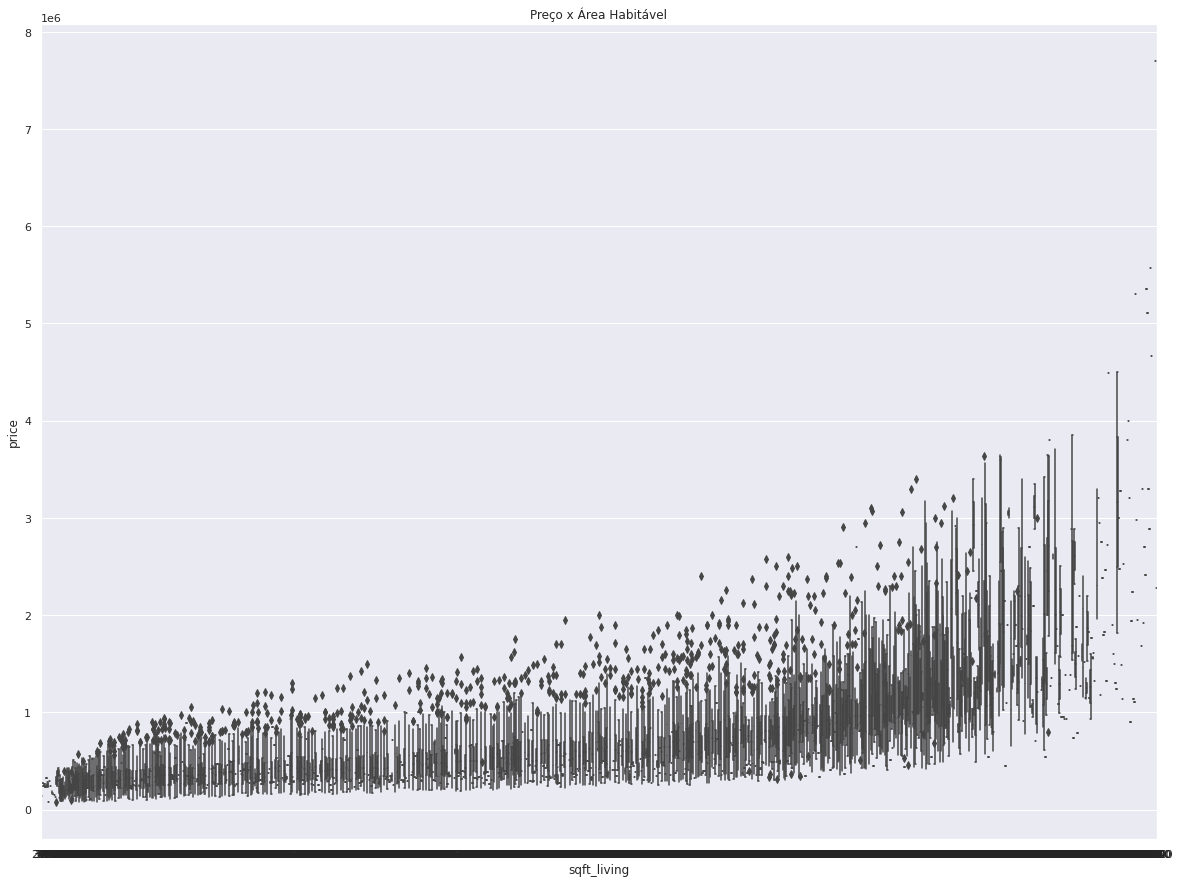

In [ ]:
# Distribuição dos preços dos imóveis de acordo com a área habitável

sns.boxplot (data = df, x ='sqft_living', y = 'price').set_title('Preço x Área Habitável');

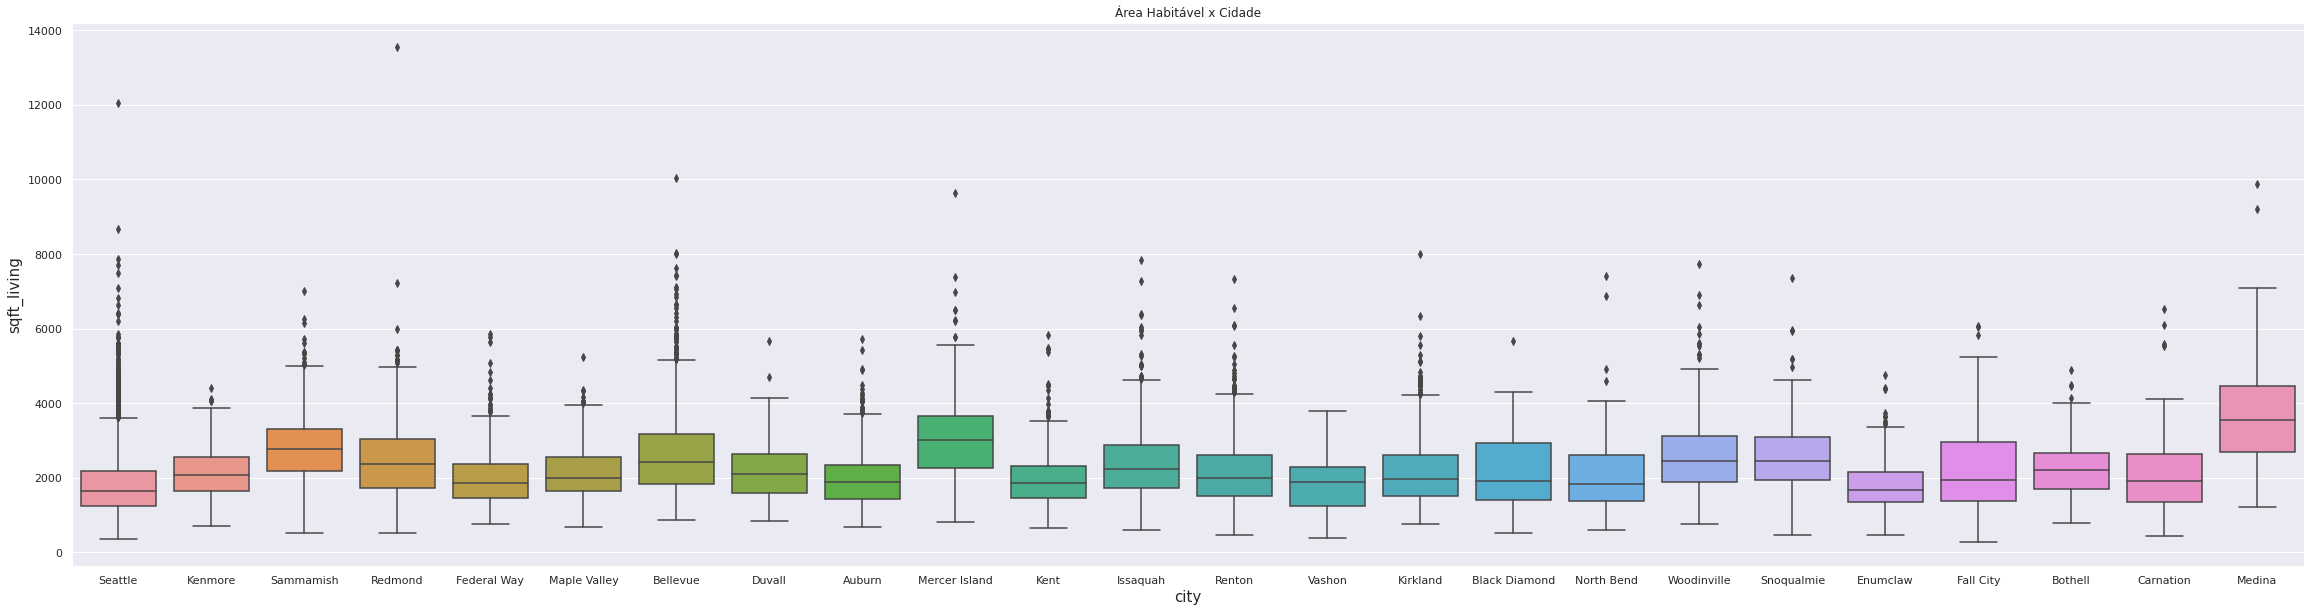

In [ ]:
# Distribuição da área habitável dos imóveis por cada cidade

fig, ax = plt.subplots(figsize=(40, 10))

plt. xlabel('city', fontsize=15), plt. ylabel('sqft_living', fontsize=15)

sns.boxplot (data = df, x = df['city'] , y = 'sqft_living').set_title('Área Habitável x Cidade');


## Classificação da qualidade dos imóveis

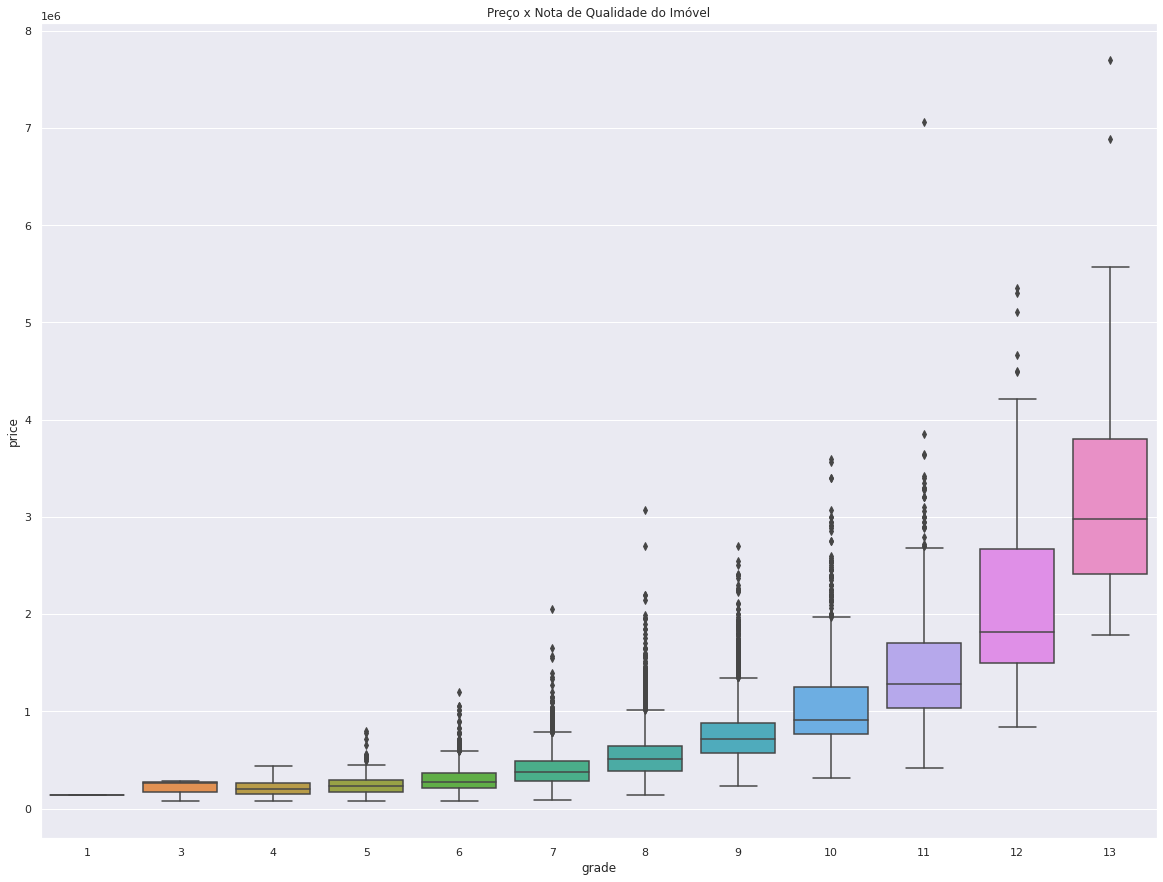

In [ ]:
# Distribuição dos preços de acordo com as notas de qualidade dos imóveis

sns.boxplot (data = df, x ='grade', y = 'price').set_title('Preço x Nota de Qualidade do Imóvel');

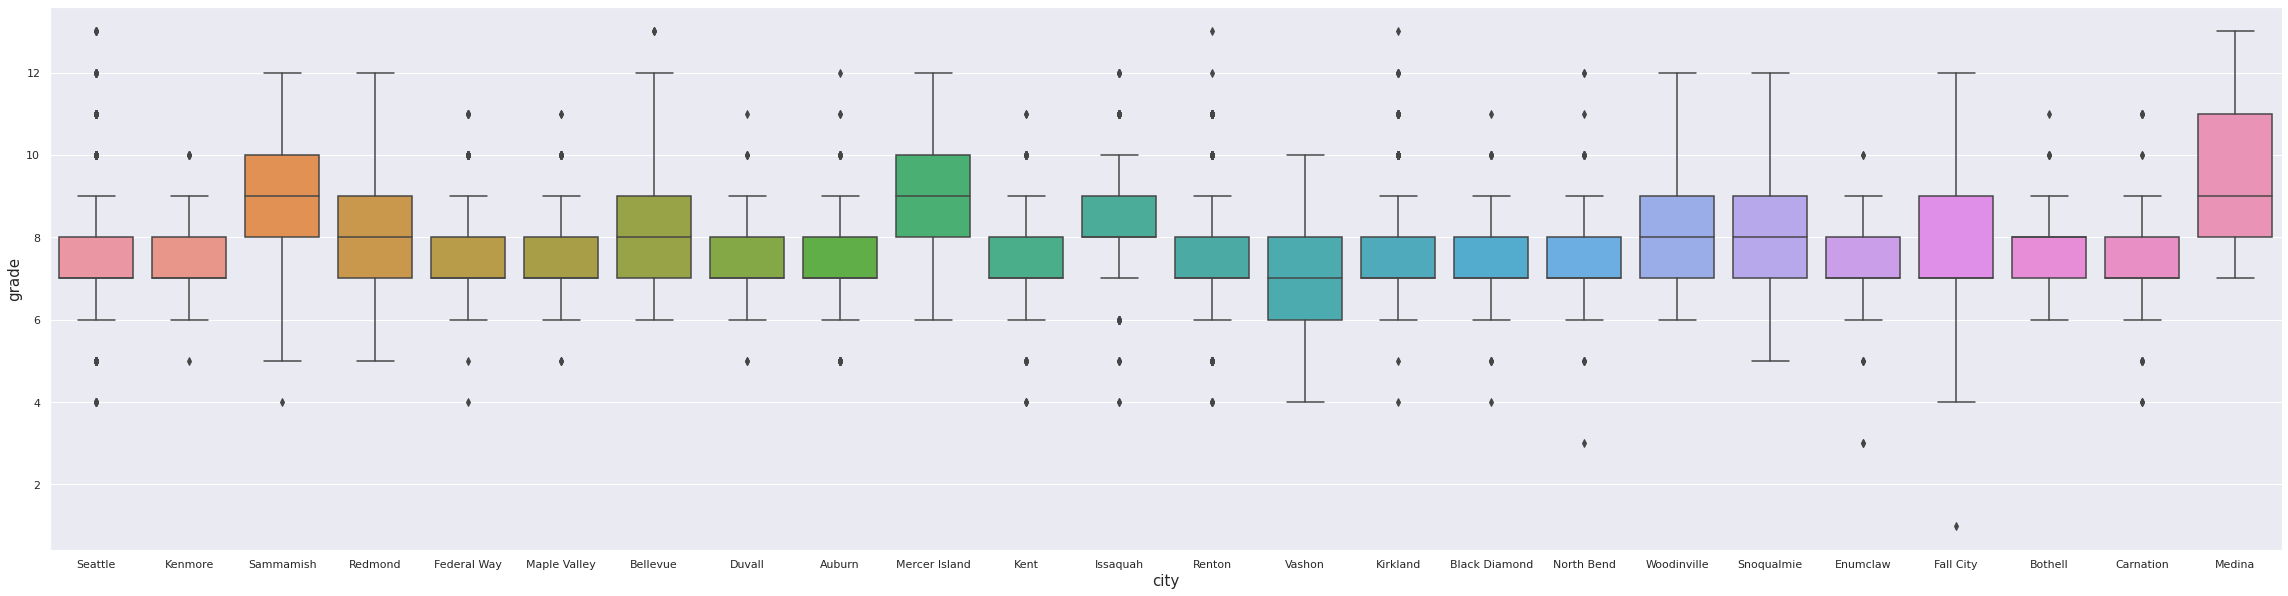

In [ ]:
# Distribuição da nota de qualidade dos imóveis por cada cidade

fig, ax = plt.subplots(figsize=(40, 10))

plt. xlabel('city', fontsize=15), plt. ylabel('grade', fontsize=15)

sns.boxplot (data = df, x = df['city'] , y = 'grade');


## Área acima do solo

Text(0.5, 1.0, 'Preço x Área Acima do Solo')

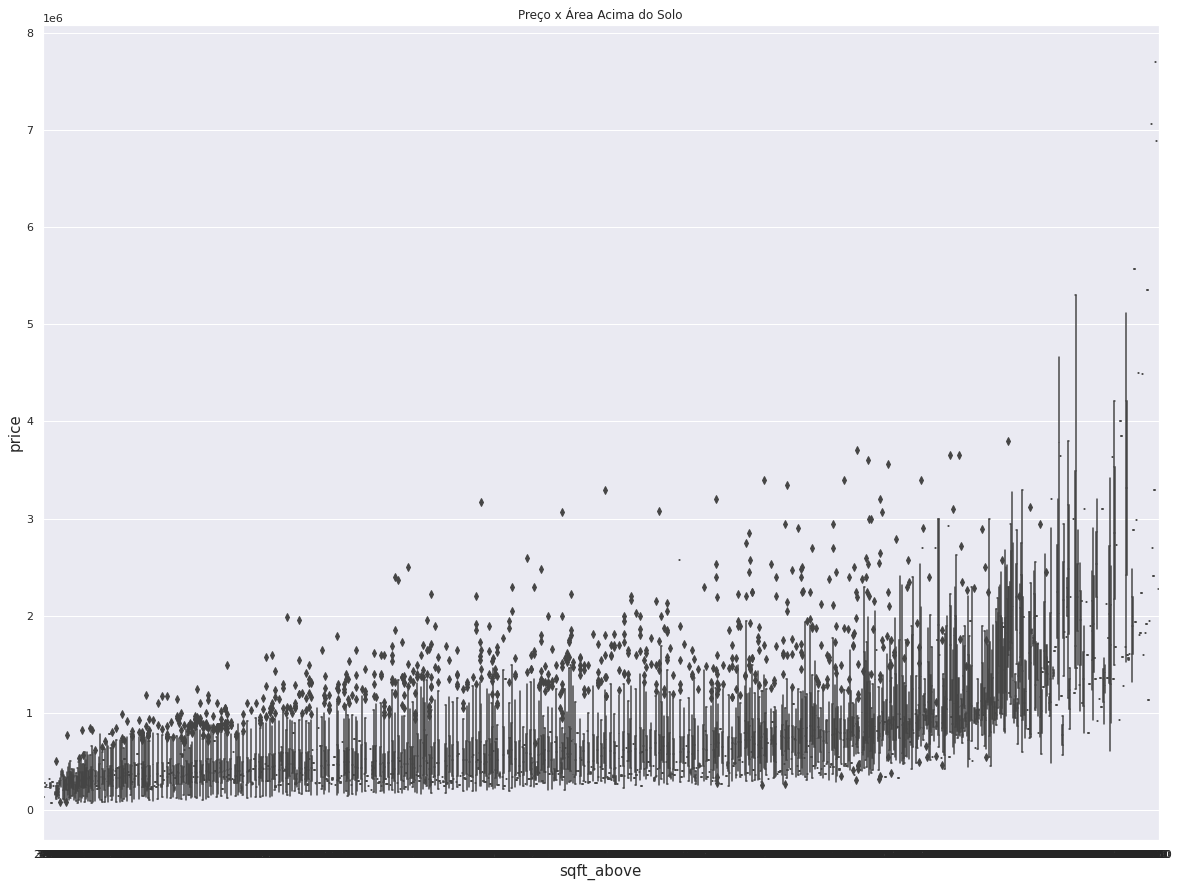

In [ ]:
# Distribuição dos preços dos imóveis de acordo com a área acima do solo

plt. xlabel('sqft_above', fontsize=15), plt. ylabel('price', fontsize=15)

sns.boxplot (data = df, x ='sqft_above', y = 'price').set_title('Preço x Área Acima do Solo')

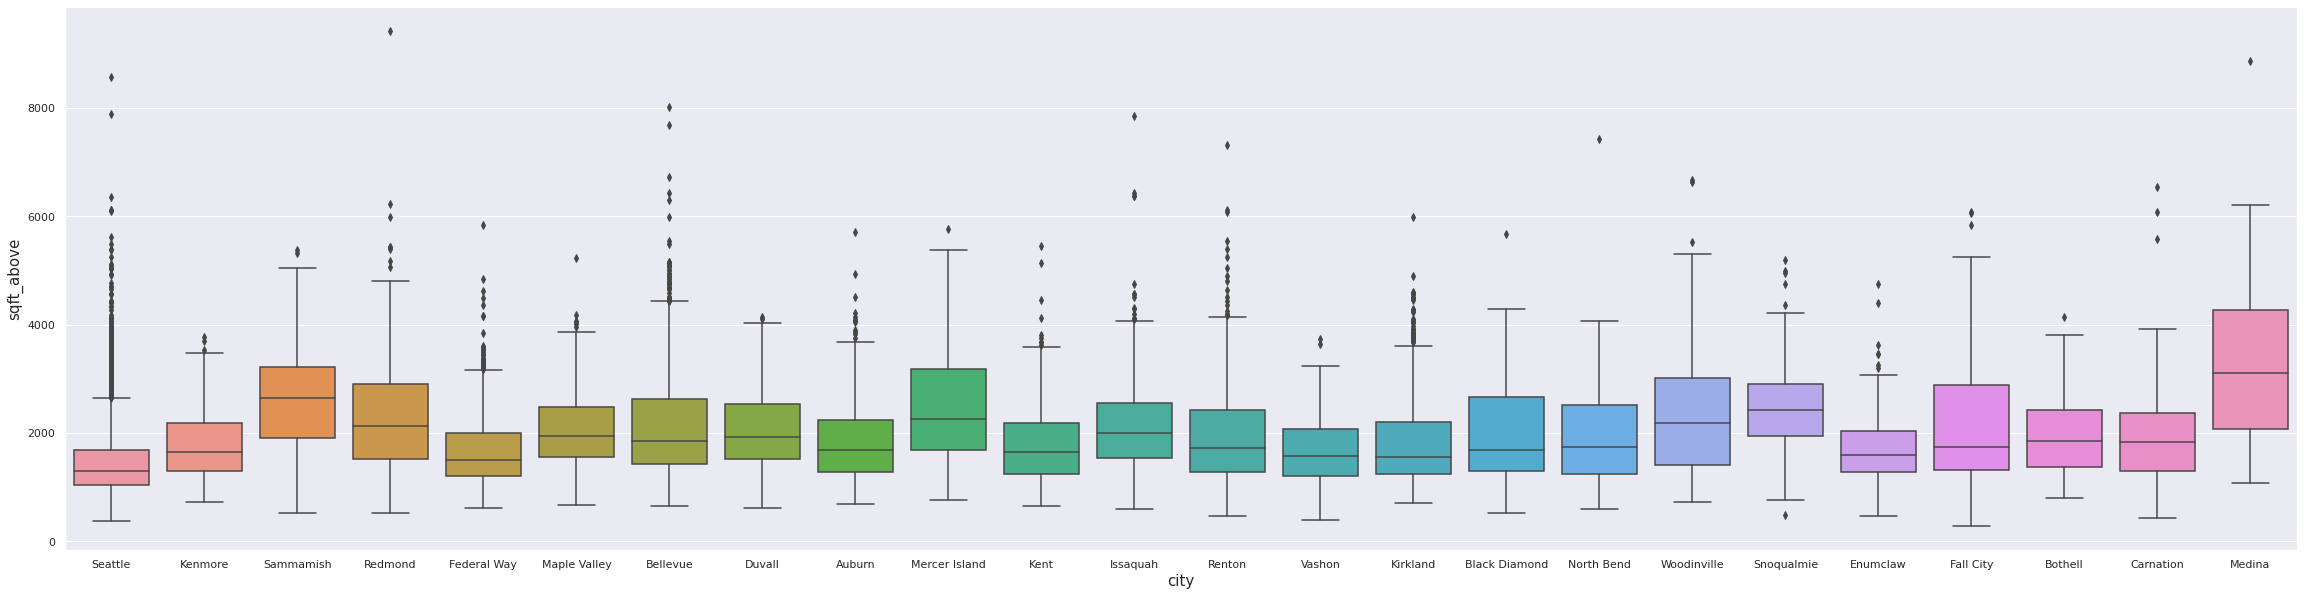

In [ ]:
# Distribuição da área acima do solo dos imóveis por cada cidade

fig, ax = plt.subplots(figsize=(40, 10))

plt. xlabel('city', fontsize=15), plt. ylabel('sqft_above', fontsize=15)

sns.boxplot (data = df, x = df['city'] , y = 'sqft_above');

## Média da área dos 15 imóveis mais próximos

Text(0.5, 1.0, 'Preço x Média da Área Habitável de 15 Imóveis')

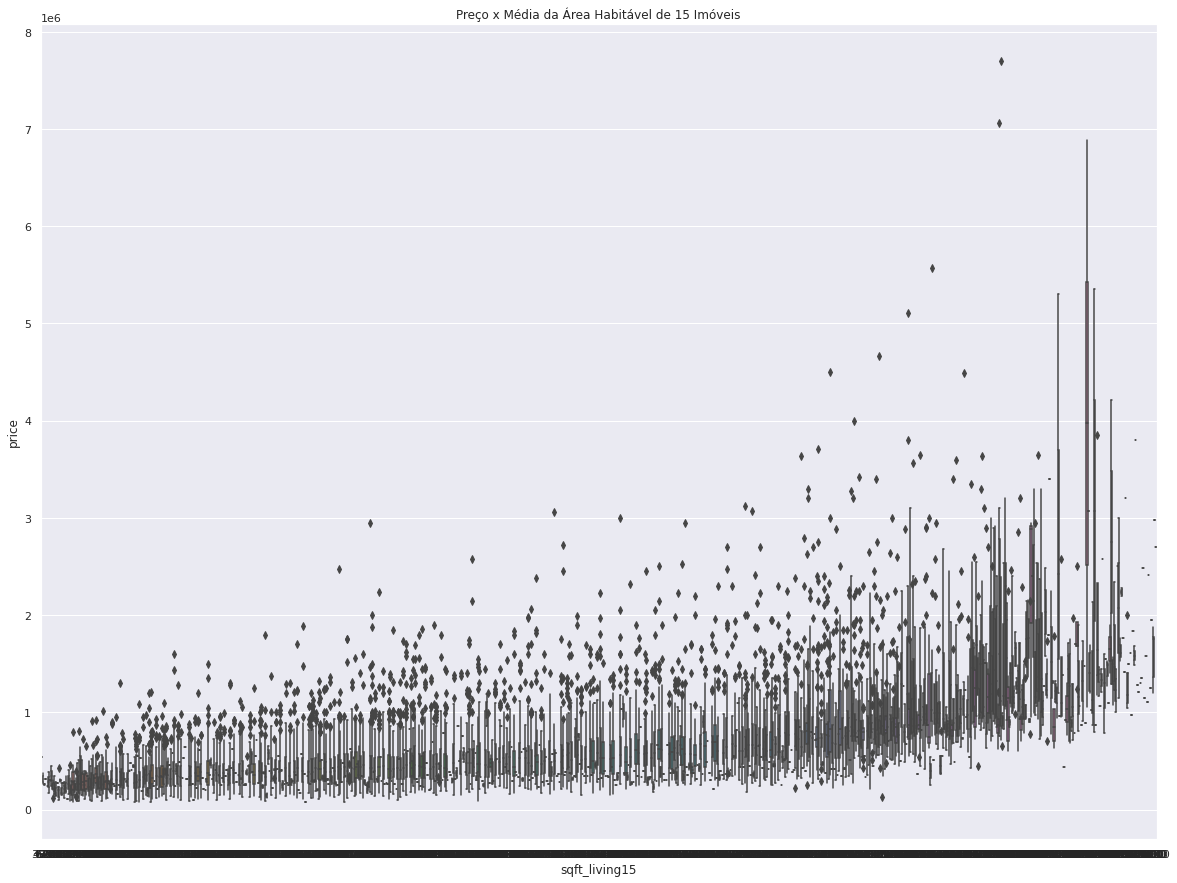

In [ ]:
# Distribuição dos preços dos imóveis de acordo com a média da área habitável dos 15 imóveis próximos

sns.boxplot (data = df, x ='sqft_living15', y = 'price').set_title('Preço x Média da Área Habitável de 15 Imóveis')

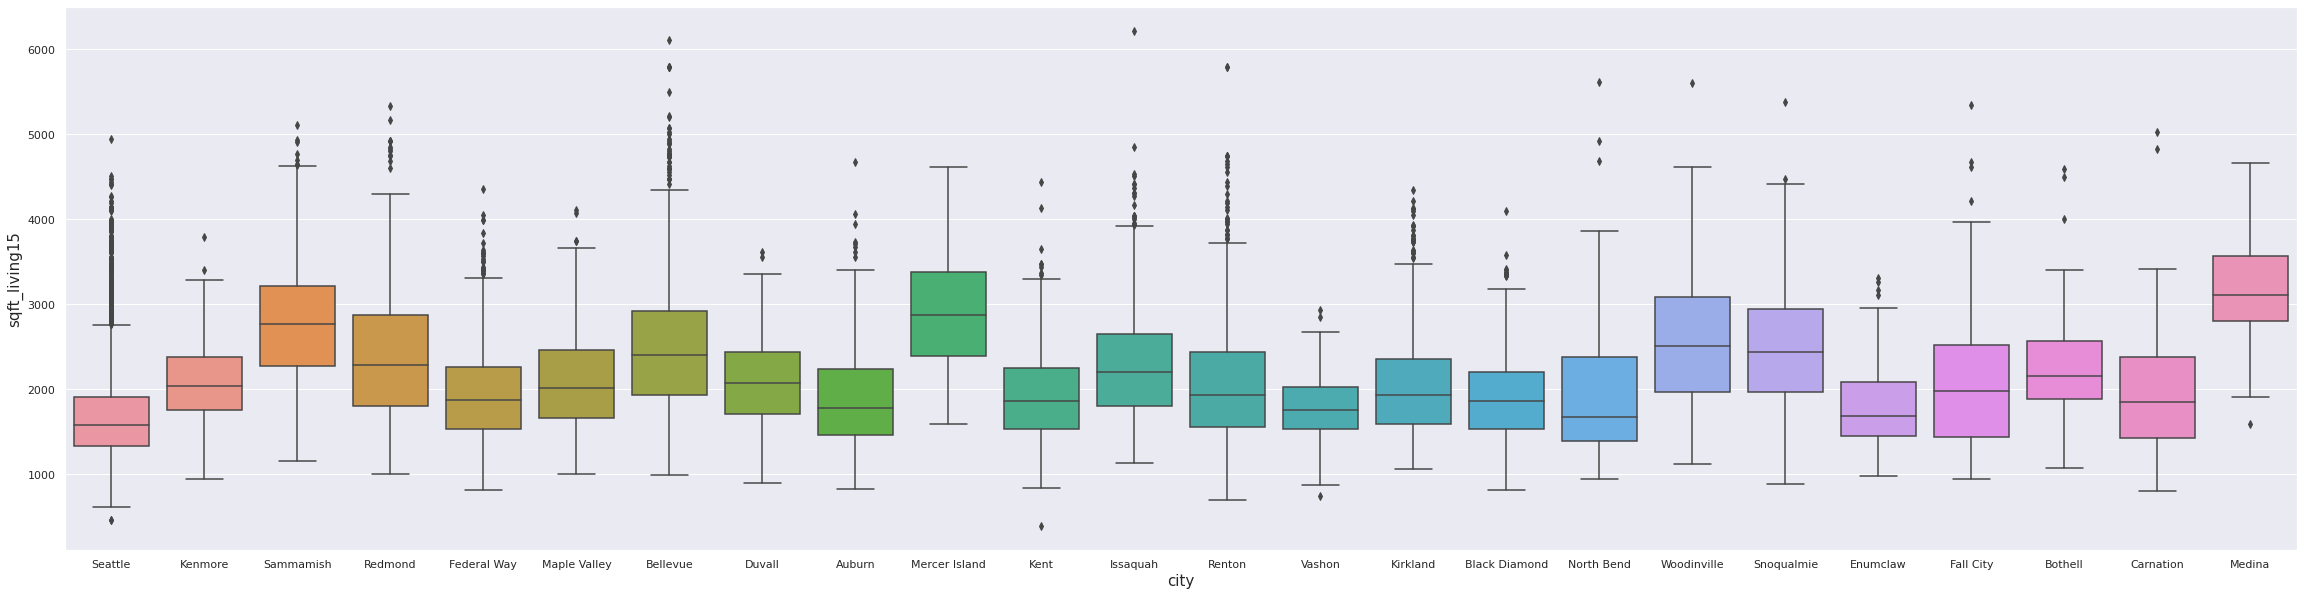

In [ ]:
# Distribuição média da área habitável dos 15 imóveis nas proximidades por cada cidade

fig, ax = plt.subplots(figsize=(40, 10))

plt. xlabel('city', fontsize=15), plt. ylabel('sqft_living15', fontsize=15)

sns.boxplot (data = df, x = df['city'] , y = 'sqft_living15');

## Banheiros

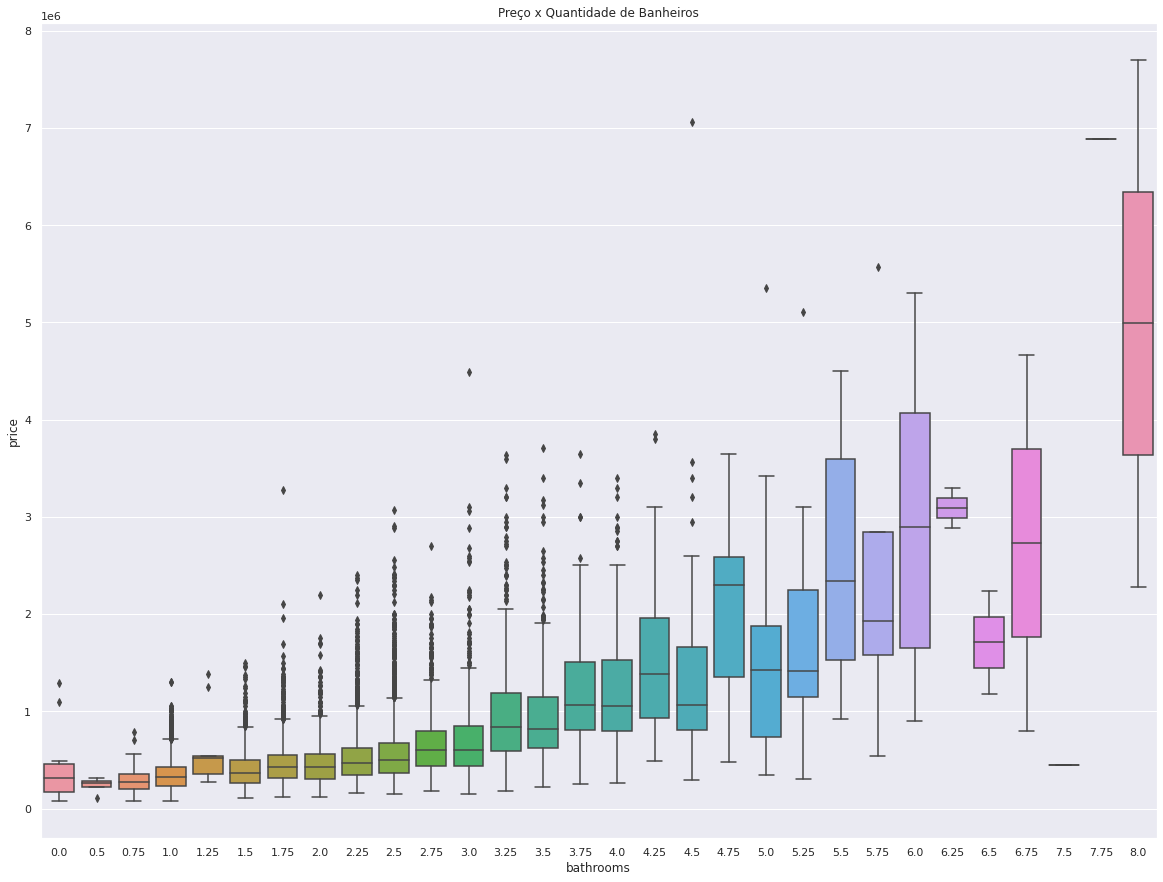

In [ ]:
# Distribuição dos preços dos imóveis de acordo com a quantidade de banheiros

sns.boxplot (data = df, x ='bathrooms', y = 'price').set_title('Preço x Quantidade de Banheiros');

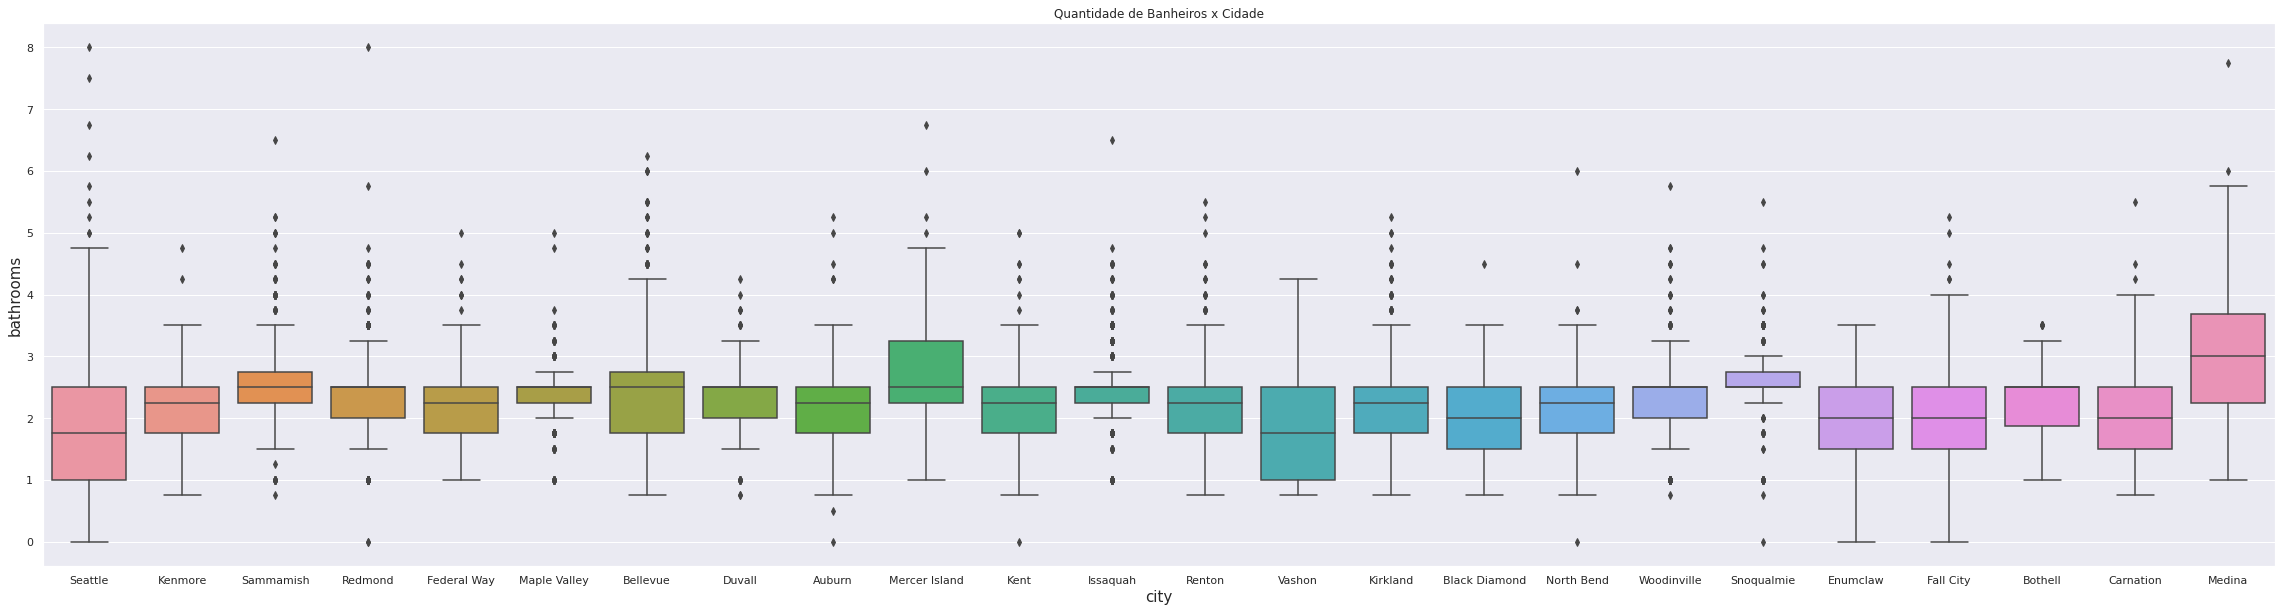

In [ ]:
# Distribuição da quantidade de banheiros pelos imóveis de cada cidade

fig, ax = plt.subplots(figsize=(40, 10))

plt. xlabel('city', fontsize=15), plt. ylabel('bathrooms', fontsize=15)

sns.boxplot (data = df, x = df['city'] , y = 'bathrooms').set_title('Quantidade de Banheiros x Cidade');

## Reforma

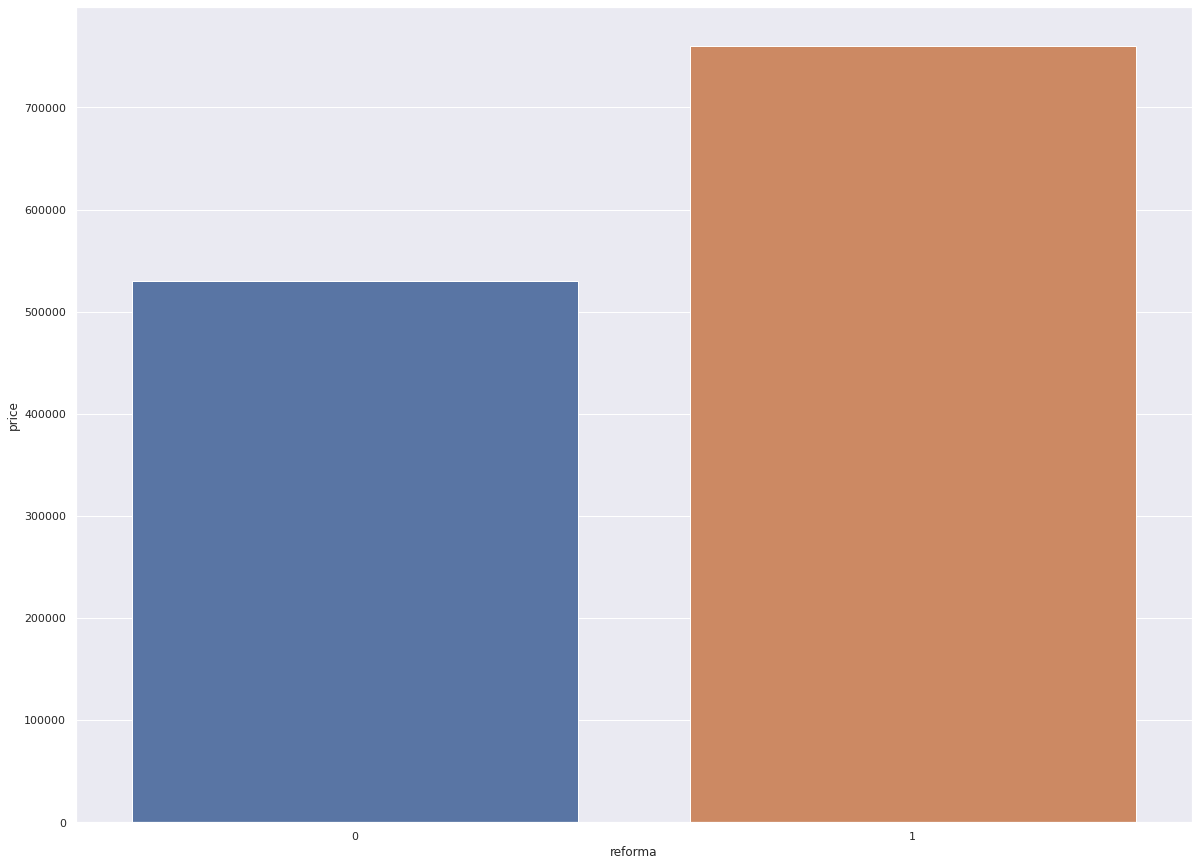

In [ ]:
# Analisando o preço médio dos imóveis caso tenham sido reformados ou não

media_reforma = df.groupby('reforma')['price'].mean()

sns.barplot(x=media_reforma.index, y = media_reforma);

## Valor do ft² da área habitável 

In [ ]:
# Analisando a informação do valor de cada ft² da área habitável

display(df['liv_value'].describe())


count    21613.000000
mean       264.156594
std        110.060793
min         87.588235
25%        182.291667
50%        244.644550
75%        318.322981
max        810.138889
Name: liv_value, dtype: float64

In [ ]:
# Identificando a média do valor do ft² da área habitável por cidade

display(df.groupby(['city']).mean().sort_values('liv_value'))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,reforma,ft_value,liv_value
city,,,,,,,,,,,,,,,,,,,,,
Federal Way,5.200648e+09,2.893849e+05,3.400513,2.056483,1967.858793,10517.973042,1.318999,0.005135,0.155327,3.381258,...,1690.596919,277.261874,1978.118100,25.581515,98015.811297,1932.268293,9739.277279,0.012837,32.357975,151.864892
Auburn,4.397210e+09,2.914815e+05,3.416667,2.059759,1954.723684,20075.640351,1.475877,0.000000,0.095395,3.418860,...,1810.166667,144.557018,1981.213816,43.667763,98036.241228,1868.433114,17733.768640,0.021930,33.826254,153.044820
Kent,4.584910e+09,2.995499e+05,3.438903,2.095594,1941.147132,14973.598504,1.458437,0.000000,0.029925,3.477140,...,1763.203658,177.943475,1982.851205,33.208645,98035.901912,1908.391521,11417.439734,0.016625,36.174340,160.586410
Maple Valley,4.125927e+09,3.668676e+05,3.435593,2.375847,2147.715254,25385.654237,1.740678,0.000000,0.027119,3.193220,...,2054.918644,92.796610,1995.811864,37.242373,98038.000000,2118.422034,20054.767797,0.018644,48.930616,173.656235
Enumclaw,4.012014e+09,3.157093e+05,3.149573,1.910256,1832.324786,74102.047009,1.322650,0.000000,0.628205,3.730769,...,1723.307692,109.017094,1971.517094,127.756410,98022.000000,1798.803419,51451.641026,0.064103,21.900871,181.806440
Renton,4.324541e+09,4.034429e+05,3.507827,2.130088,2100.641828,13905.783970,1.466187,0.001879,0.080776,3.483406,...,1899.297433,201.344396,1979.654352,47.536631,98057.281152,2035.849718,10896.817783,0.023795,50.405302,196.573536
Duvall,3.137918e+09,4.247887e+05,3.363158,2.290789,2171.557895,39838.384211,1.721053,0.000000,0.021053,3.073684,...,2036.242105,135.315789,1991.642105,62.973684,98019.000000,2103.721053,37016.510526,0.031579,43.117761,203.001725
Black Diamond,3.879195e+09,4.236660e+05,3.290000,2.027500,2137.590000,55465.300000,1.480000,0.000000,0.100000,3.530000,...,2000.340000,137.250000,1979.180000,218.370000,98010.000000,2008.760000,47830.270000,0.110000,21.086372,210.095356
Snoqualmie,7.393758e+09,5.279612e+05,3.522581,2.545161,2571.322581,17065.183871,1.879032,0.000000,0.290323,3.045161,...,2455.612903,115.709677,1997.132258,38.409677,98065.000000,2518.274194,11241.748387,0.019355,81.383830,210.886047


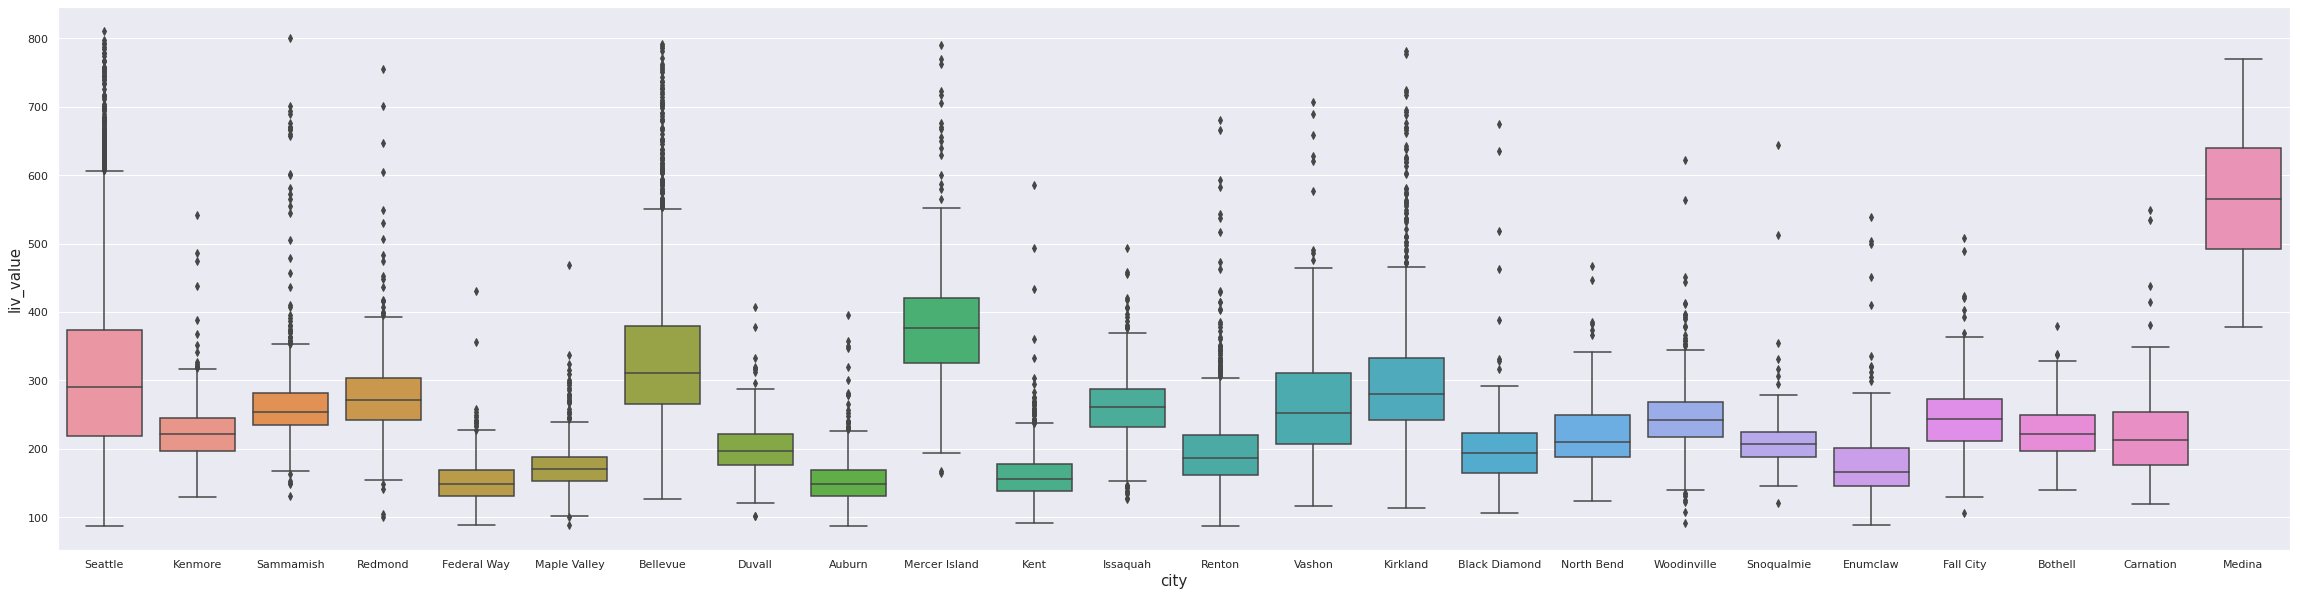

In [ ]:
# Visualizando o valor do ft² na forma gráfica

fig, ax = plt.subplots(figsize=(40, 10))

plt. xlabel('city', fontsize=15), plt. ylabel('liv_value', fontsize=15)

sns.boxplot (data = df, x = df['city'] , y = 'liv_value');

#Análise final e sugestão de imóveis

In [ ]:
# Ordenando as cidades de acordo com as variáveis que tem maior impacto positivo sobre o preço dos imóveis 

display(df.groupby(['city']).mean().sort_values(['sqft_living','grade','sqft_above','sqft_living15','bathrooms']))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,reforma,ft_value,liv_value
city,,,,,,,,,,,,,,,,,,,,,
Seattle,4.603246e+09,5.349638e+05,3.169433,1.893868,1795.251532,6454.443801,1.461234,0.008132,0.302885,3.438454,...,1443.223014,352.028517,1954.970257,124.297872,98133.633062,1682.882366,6181.084995,0.062270,130.297142,304.774958
Enumclaw,4.012014e+09,3.157093e+05,3.149573,1.910256,1832.324786,74102.047009,1.322650,0.000000,0.628205,3.730769,...,1723.307692,109.017094,1971.517094,127.756410,98022.000000,1798.803419,51451.641026,0.064103,21.900871,181.806440
Vashon,3.250135e+09,4.874796e+05,2.754237,1.900424,1880.271186,97262.957627,1.406780,0.203390,1.084746,3.686441,...,1675.381356,204.889831,1968.025424,168.745763,98070.000000,1776.949153,81290.864407,0.084746,15.078357,281.343363
Kent,4.584910e+09,2.995499e+05,3.438903,2.095594,1941.147132,14973.598504,1.458437,0.000000,0.029925,3.477140,...,1763.203658,177.943475,1982.851205,33.208645,98035.901912,1908.391521,11417.439734,0.016625,36.174340,160.586410
Auburn,4.397210e+09,2.914815e+05,3.416667,2.059759,1954.723684,20075.640351,1.475877,0.000000,0.095395,3.418860,...,1810.166667,144.557018,1981.213816,43.667763,98036.241228,1868.433114,17733.768640,0.021930,33.826254,153.044820
Federal Way,5.200648e+09,2.893849e+05,3.400513,2.056483,1967.858793,10517.973042,1.318999,0.005135,0.155327,3.381258,...,1690.596919,277.261874,1978.118100,25.581515,98015.811297,1932.268293,9739.277279,0.012837,32.357975,151.864892
North Bend,5.020409e+09,4.394711e+05,3.230769,2.110860,2063.823529,50078.054299,1.502262,0.000000,0.266968,3.149321,...,1937.669683,126.153846,1985.705882,45.095023,98045.000000,1913.778281,32183.325792,0.022624,28.787504,220.464528
Renton,4.324541e+09,4.034429e+05,3.507827,2.130088,2100.641828,13905.783970,1.466187,0.001879,0.080776,3.483406,...,1899.297433,201.344396,1979.654352,47.536631,98057.281152,2035.849718,10896.817783,0.023795,50.405302,196.573536
Carnation,4.240656e+09,4.556171e+05,3.000000,2.048387,2117.967742,96902.862903,1.504032,0.000000,0.185484,3.153226,...,1983.532258,134.435484,1980.927419,48.370968,98014.000000,1929.016129,77979.620968,0.024194,17.774900,223.084512


In [ ]:
# Filtrando os imóveis da cidade de Seattle para identificar as piores opções de compra

seattle = df[df['city'] == 'Seattle']

display(seattle.groupby(['id']).mean().sort_values(['sqft_living','grade','sqft_above','sqft_living15','bathrooms']))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,reforma,ft_value,liv_value
id,,,,,,,,,,,,,,,,,,,,
2856101479,276000.0,1.0,0.75,370.0,1801.0,1.0,0.0,0.0,5.0,5.0,370.0,0.0,1923.0,0.0,98117.0,1340.0,5000.0,0.0,153.248195,745.945946
1723049033,245000.0,1.0,0.75,380.0,15000.0,1.0,0.0,0.0,3.0,5.0,380.0,0.0,1963.0,0.0,98168.0,1170.0,15000.0,0.0,16.333333,644.736842
6896300380,228000.0,0.0,1.00,390.0,5900.0,1.0,0.0,0.0,2.0,4.0,390.0,0.0,1953.0,0.0,98118.0,2170.0,6000.0,0.0,38.644068,584.615385
9266700190,245000.0,1.0,1.00,390.0,2000.0,1.0,0.0,0.0,4.0,6.0,390.0,0.0,1920.0,0.0,98103.0,1340.0,5100.0,0.0,122.500000,628.205128
6303400395,325000.0,1.0,0.75,410.0,8636.0,1.0,0.0,0.0,2.0,4.0,410.0,0.0,1953.0,0.0,98146.0,1190.0,8636.0,0.0,37.633164,792.682927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9175600025,800000.0,7.0,6.75,7480.0,41664.0,2.0,0.0,2.0,3.0,11.0,5080.0,2400.0,1953.0,0.0,98166.0,2810.0,33190.0,0.0,19.201229,106.951872
1346300150,3300000.0,8.0,4.00,7710.0,11750.0,3.5,0.0,0.0,5.0,12.0,6090.0,1620.0,1904.0,0.0,98112.0,4210.0,8325.0,0.0,280.851064,428.015564
2426039123,2415000.0,5.0,4.75,7880.0,24250.0,2.0,0.0,2.0,3.0,13.0,7880.0,0.0,1996.0,0.0,98177.0,2740.0,10761.0,0.0,99.587629,306.472081


In [ ]:
# Filtrando os imóveis da cidade de Medina para identificar as melhores opções de compra

medina = df[df['city'] == 'Medina']


display(medina.groupby(['id']).mean().sort_values(['sqft_living','grade','sqft_above','sqft_living15','bathrooms']))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,reforma,ft_value,liv_value
id,,,,,,,,,,,,,,,,,,,,
3262300940,907500.0,3.0,1.00,1220.0,8119.0,1.0,0.0,0.0,4.0,7.0,1220.0,0.0,1955.0,0.0,98039.0,1910.0,8119.0,0.0,111.774849,743.852459
2210500019,937500.0,3.0,1.00,1320.0,8500.0,1.0,0.0,0.0,4.0,7.0,1320.0,0.0,1954.0,0.0,98039.0,2790.0,10800.0,0.0,110.294118,710.227273
3262301610,865000.0,3.0,1.50,1530.0,10827.0,1.0,0.0,0.0,4.0,8.0,1530.0,0.0,1955.0,0.0,98039.0,2050.0,10827.0,0.0,79.892860,565.359477
5425700150,787500.0,4.0,1.75,1580.0,9382.0,1.0,0.0,0.0,3.0,7.0,1080.0,500.0,1963.0,0.0,98039.0,2010.0,9382.0,0.0,83.937327,498.417722
3625049079,1350000.0,3.0,2.00,2070.0,9600.0,1.0,0.0,1.0,3.0,7.0,1590.0,480.0,1946.0,0.0,98039.0,3000.0,16215.0,0.0,140.625000,652.173913
3262300920,1200000.0,4.0,3.00,2150.0,8119.0,2.0,0.0,0.0,3.0,8.0,2150.0,0.0,1953.0,2004.0,98039.0,1590.0,8119.0,1.0,147.801453,558.139535
5426300060,1000000.0,3.0,2.25,2300.0,15952.0,1.0,0.0,0.0,4.0,8.0,1150.0,1150.0,1963.0,0.0,98039.0,2200.0,14284.0,0.0,62.688064,434.782609
3025300250,1620000.0,4.0,2.25,2350.0,17709.0,2.0,0.0,0.0,4.0,9.0,2350.0,0.0,1977.0,0.0,98039.0,3360.0,19855.0,0.0,91.478909,689.361702
6447300225,1880000.0,3.0,2.75,2620.0,17919.0,1.0,0.0,1.0,4.0,9.0,2620.0,0.0,1949.0,0.0,98039.0,3400.0,14400.0,0.0,104.916569,717.557252


## Insights finais

Para decidir quais imóveis adquirir aconselha-se que a empresa opte por imóveis que se encontram na cidade de Medina, que possuam uma grande área habitável (de preferência acima dos 6.000 ft²), possuam um maior número de banheiros (aproximadamente 5), que sejam classificados com as maiores notas de qualidade possíveis, com uma área acima do solo (imóveis a partir de 5.000 ft²). Além disso, aconselha-se a procura por imóveis que ainda não foram reformados, pois após realizar uma reforma a tendência é de que o preço de venda do mesmo suba. 

## Sugestão de compra

In [ ]:
# Sugestão de 5 imóveis para comprar

display(medina.groupby(['id']).mean().sort_values(['sqft_living','grade','sqft_above','sqft_living15','bathrooms']).tail())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,reforma,ft_value,liv_value
id,,,,,,,,,,,,,,,,,,,,
7397300170,3710000.0,4.0,3.50,5550.0,28078.0,2.0,0.0,2.0,4.0,12.0,3350.0,2200.0,2000.0,0.0,98039.0,2980.0,19602.0,0.0,132.131918,668.468468
3262300555,2458000.0,4.0,5.25,6500.0,14986.0,2.0,0.0,0.0,3.0,11.0,5180.0,1320.0,2001.0,0.0,98039.0,2270.0,8119.0,0.0,164.019752,378.153846
6447300265,4000000.0,4.0,5.50,7080.0,16573.0,2.0,0.0,0.0,3.0,12.0,5760.0,1320.0,2008.0,0.0,98039.0,3140.0,15996.0,0.0,241.356423,564.971751
2470100110,5570000.0,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,2001.0,0.0,98039.0,3560.0,24345.0,0.0,158.829736,605.434783
9208900037,6885000.0,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,4540.0,42730.0,0.0,219.449225,696.157735


In [ ]:
# Sugestão de 5 imóveis para não comprar

display(seattle.groupby(['id']).mean().sort_values(['sqft_living','grade','sqft_above','sqft_living15','bathrooms']).head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,reforma,ft_value,liv_value
id,,,,,,,,,,,,,,,,,,,,
2856101479,276000.0,1.0,0.75,370.0,1801.0,1.0,0.0,0.0,5.0,5.0,370.0,0.0,1923.0,0.0,98117.0,1340.0,5000.0,0.0,153.248195,745.945946
1723049033,245000.0,1.0,0.75,380.0,15000.0,1.0,0.0,0.0,3.0,5.0,380.0,0.0,1963.0,0.0,98168.0,1170.0,15000.0,0.0,16.333333,644.736842
6896300380,228000.0,0.0,1.00,390.0,5900.0,1.0,0.0,0.0,2.0,4.0,390.0,0.0,1953.0,0.0,98118.0,2170.0,6000.0,0.0,38.644068,584.615385
9266700190,245000.0,1.0,1.00,390.0,2000.0,1.0,0.0,0.0,4.0,6.0,390.0,0.0,1920.0,0.0,98103.0,1340.0,5100.0,0.0,122.500000,628.205128
6303400395,325000.0,1.0,0.75,410.0,8636.0,1.0,0.0,0.0,2.0,4.0,410.0,0.0,1953.0,0.0,98146.0,1190.0,8636.0,0.0,37.633164,792.682927
